# <center>Le troisième TD de morpho-math</center>

- Morphologie en niveaux de gris
- Conversion numpy <-> graphe

## Morphologie en niveaux de gris

In [1]:
## pour avoir des figures "en ligne"
%matplotlib inline

In [2]:
## le minimum syndical
import matplotlib.pylab as plt
import numpy as np
from copy import deepcopy
import morphograph
import morphograph as mg

## pour pouvoir continuer à éditer morphograph.py
import importlib
importlib.reload(morphograph)


from morphograph import Graph


In [3]:
from PIL import Image

In [4]:
fpi=Image.open("images/FingerNDG.pgm")

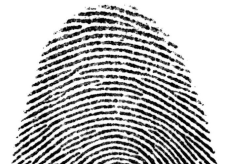

In [5]:
fpi ## fingerprint image

In [6]:
def numpy2graph(npbuffer,verbose=False):
    '''
    Convert an Numpy buffer to a graph
    '''
    try:
        ## dimensions
        (dimY,dimX)=npbuffer.shape
        edges,nodes=mg.createEmptyGraph(dimX,dimY)
        ## convert to 1D
        buff1d = np.ravel(npbuffer)
        for k in range(dimX*dimY):
            nodes[k][2] = 255-int(buff1d[k]) ## interpretation blanc = valeurs élevées

    except:
        print("*** Exception: k=%d" % k)
    return(Graph(edges,nodes,dimX,dimY))

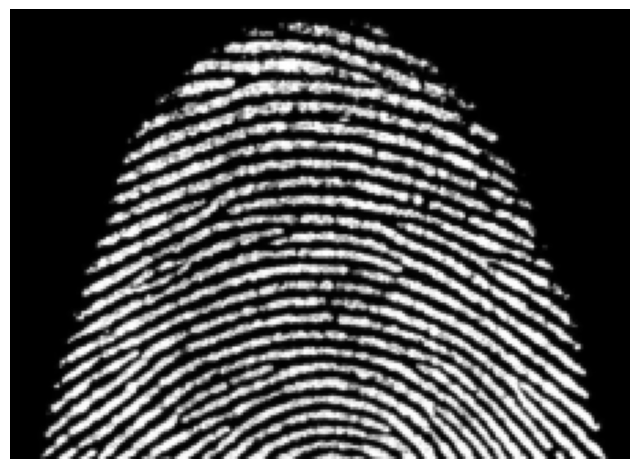

In [7]:
fpn = np.asarray(fpi)
fpg = numpy2graph(fpn)
fpg.show()

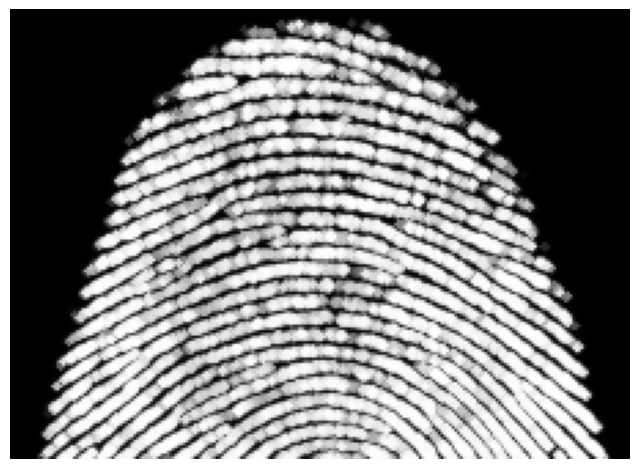

In [8]:
fpdil = mg.dilate(fpg)
fpdil.show()

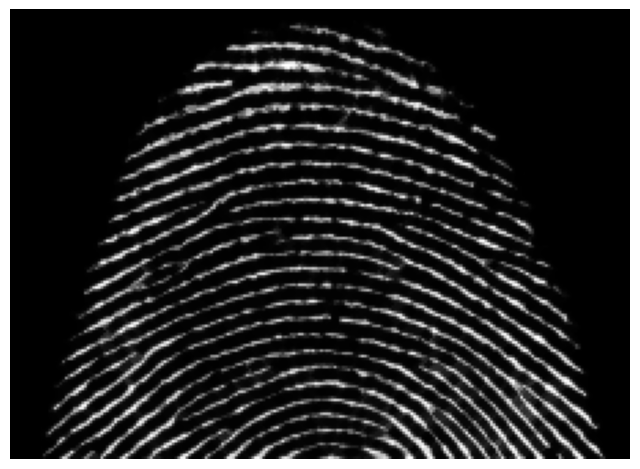

In [9]:
fpero = mg.erode(fpg)
fpero.show()

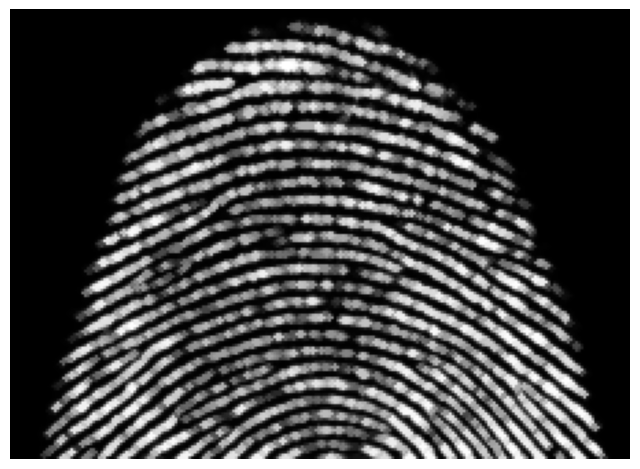

In [10]:
fpopen = mg.ouverture(fpg)
fpopen.show()

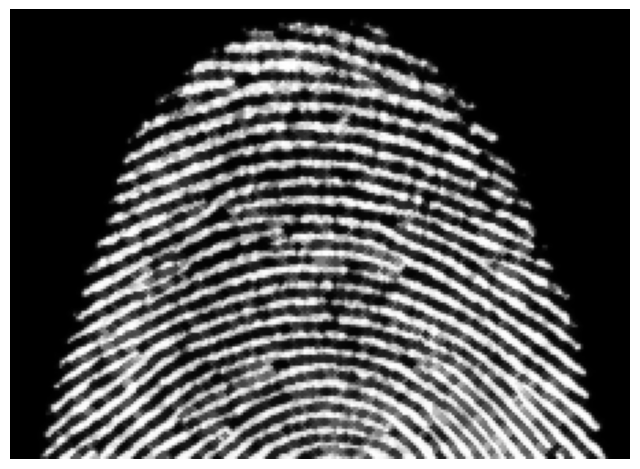

In [11]:
fpclose4 = mg.fermeture(fpg)
fpclose4.show()

In [12]:
fpgH = mg.changeAdjacency(fpg,'H')

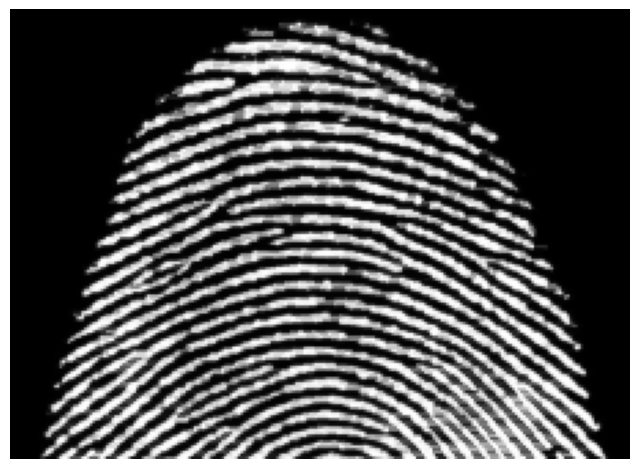

In [13]:
fpcloseH = mg.fermeture(fpgH)
fpcloseH.show()

In [14]:
## opérer le filtrage directionnel sur l'image en niveaux de gris

## horizontal / vertical
fpgh = mg.changeAdjacency(fpg,"H")
FPGcloH=mg.fermeture(fpgh)
fpgv = mg.changeAdjacency(fpg,"V")
FPGcloV = mg.fermeture(fpgv)

## diagonals
fpgd1 = mg.changeAdjacency(fpg,"D1")
FPGcloD1=mg.fermeture(fpgd1)
fpgd2 = mg.changeAdjacency(fpg,"D2")
FPGcloD2 = mg.fermeture(fpgd2)


In [15]:
## this assumes the data is in the same order for both images
def applyDualNodeOperator(g1,g2, dual_op_, verify=True):
    """
    applies a generic scalar Dual operator on the nodes of G1 and G2 and returns a new graph
    
    applique un operateur sur les sommets de deux graphes G1 et G2 et produit un nouveau graphe
    
    """
    mynodes_out = deepcopy(g1.get_nodes())
    mynodes_in = g2.get_nodes() # read only, no need to copy
    W = g1.get_W()
    H = g1.get_H()
    if (not verify):
        for i in range(0,W*H):
            mynodes_out[i][2] = dual_op_(my_nodes_out[i][2],my_nodes_in[i][2])
    else:
        for i in range(0,g1.get_H()*g1.get_W()):
            if ((mynodes_out[i][0] == mynodes_in[i][0]) and (mynodes_out[i][1] == mynodes_in[i][1])): 
                mynodes_out[i][2] = dual_op_(mynodes_out[i][2],mynodes_in[i][2])
    return(Graph(g1.get_edges(), mynodes_out, W,H))   


def inf(g1, g2, verify=True):
    """
    Pointwise infimum
    
    Minimum point à point
    """
    return(applyDualNodeOperator(g1,g2,min, verify=verify))

def sup(g1, g2, verify=True):
    """
    Pointwise supremum
    
    maximum point à point
    """
    return(applyDualNodeOperator(g1,g2,max, verify=verify))

def sub_op(v1,v2):
    return(v1-v2)

def sub(g1,g2, verify=True):
    """
    Pointwise subtraction
    
    Soustraction point à point
    """
    return(applyDualNodeOperator(g1,g2,sub_op,verify=verify))

In [16]:
minGVH = inf(FPGcloH,FPGcloV)
minGD1D2 = inf(FPGcloD1,FPGcloD2)
minOrient = inf(minGVH,minGD1D2)

In [17]:
def sideplot(graph1, graph2):
    fig=plt.figure(figsize=(16,16)) 
    ax1 = fig.add_subplot(1,2,1)
    ax1.axis('off')
    ax1.imshow(graph1.image(),cmap="gray")
    ax2 = fig.add_subplot(1,2,2)
    ax2.axis('off')
    ax2.imshow(graph2.image(),cmap="gray")
    fig.show()

<ipython-input-34-2fedadfbc0b0>:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


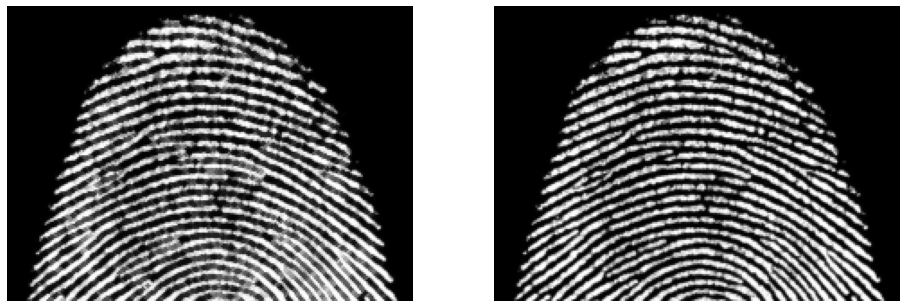

In [35]:
sideplot(fpclose4,minOrient)

In [18]:
def seuillage(graph_in, value):
    """
    Crée graphe de sortie Out
    
    pour tous les sommets 's' de Graph
        si G(s) > value
          H(s) = 1
        sinon
          H(s) = 0#
    """
    mynodes_out = deepcopy(graph_in.get_nodes())
    mynodes_in = graph_in.get_nodes() # read only, no need to copy
    W = graph_in.get_W()
    H = graph_in.get_H()
    for i in range(0,W*H):
        if (mynodes_in[i][2] > value):
            mynodes_out[i][2] = 1
        else:
            mynodes_out[i][2] = 0
    return(Graph(graph_in.get_edges(), mynodes_out, W,H))

In [19]:
fpclose4bin = seuillage(fpclose4,128)

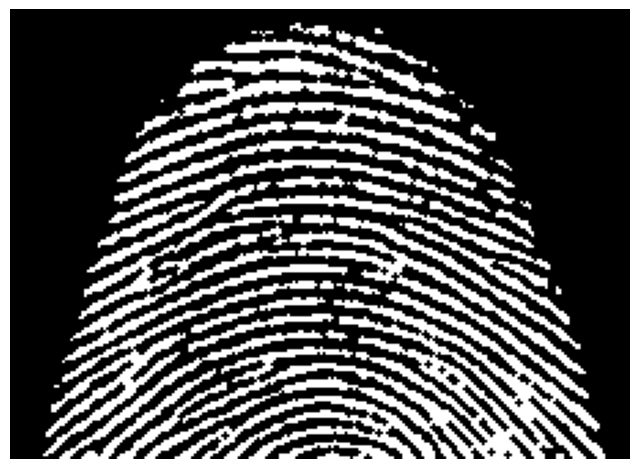

In [20]:
fpclose4bin.show()

In [39]:
## verifier que 
# seuillage(dilate(g), valeur) = dilate(seuillage(g,valeur))

In [21]:
def subtract(a,b):
    return(a-b)

def graphsub(G1,G2):
    return(mg.appyDualNodeOperator(G1,G2,subtract))
    
thn = graphsub(fpclose4,fpg)

/var/folders/nb/fyxg2dfd7dg7gl8mvm4nsx8r0000gn/T/ipykernel_58562/2092271944.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


No difference


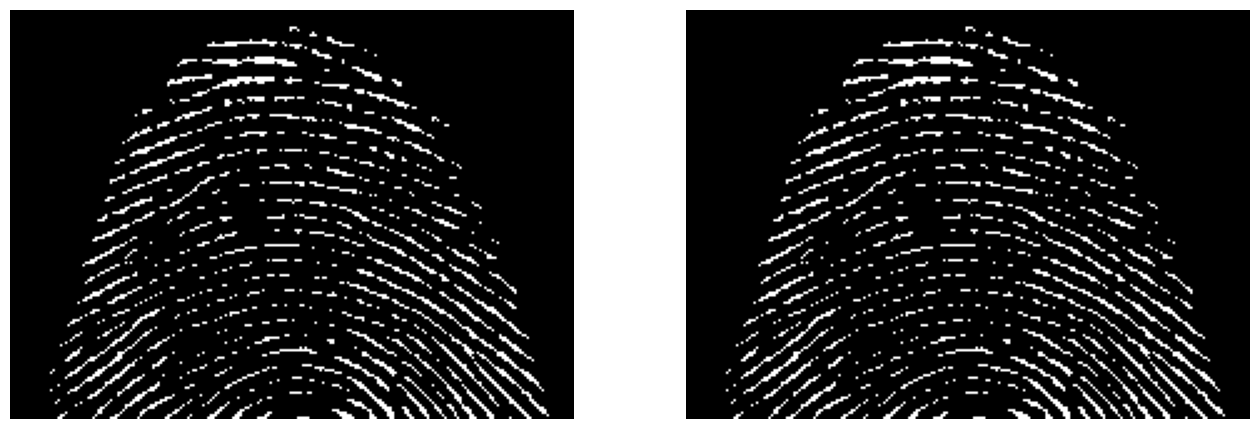

In [22]:
## verification

s1 = seuillage(mg.erode(fpg),128)
s2 = mg.erode(seuillage(fpg,128))

sideplot(s1,s2)

diff = graphsub(s1,s2)

if max(np.array(diff.nodes)[:,2]) == 0:
    print("No difference")
else:
    diff.show()

In [58]:
np.array(diff.nodes)[:,2]

array([0., 0., 0., ..., 0., 0., 0.])